<a href="https://colab.research.google.com/github/virlib/Sentiment-Analysis-and-Generating-N-grams/blob/main/Generate_N_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading csv and Creating dataframe**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/all-data.csv',encoding = "ISO-8859-1")
df.head()

,Sentiments,News Headlines
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sentiments      4846 non-null   object
 1   News Headlines  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isna().sum()

Sentiments        0
News Headlines    0
dtype: int64

In [6]:
df['Sentiments'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiments, dtype: int64

In [7]:
y=df['Sentiments'].values
y.shape

(4846,)

In [8]:
x=df['News Headlines'].values
x.shape

(4846,)

In [9]:
from sklearn.model_selection import train_test_split

# **Training and Testing Model**

In [10]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape


(2907,)

In [11]:
y_train.shape


(2907,)

In [12]:
x_test.shape


(1939,)

In [13]:
y_test.shape

(1939,)

In [14]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [15]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [16]:
df_train.head()

,news,sentiment
0,The Vaisala Group is a successful internationa...,positive
1,`` We were the lowest bidders and now the fina...,positive
2,Performance is based on values and sustainabil...,neutral
3,Combined net sales in 2006 were $ 27 million a...,neutral
4,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative


In [17]:
df3=pd.DataFrame(x_test).rename(columns={0:'news'})

In [19]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [20]:
df_test.head()

,news,sentiment
0,The share capital of Alma Media Corporation bu...,positive
1,This allows devices such as mobile phones to b...,positive
2,The newspaper 's best sales asset is high qual...,neutral
3,The three year turn-around program is expected...,neutral
4,The restructuring creates a more efficient org...,negative


In [21]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [23]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [24]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,The Vaisala Group is a successful internationa...,positive
1,We were the lowest bidders and now the final ...,positive
2,Performance is based on values and sustainabil...,neutral
3,Combined net sales in 2006 were 27 million an...,neutral
4,ADPnews Oct 21 2009 Finlandbased IT consu...,negative


In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# To Understand how N gram function works

In [ ]:
l = ['A','B','C','D']
n = 3
lists = []
for i in range(3):
    print(l[i:])        #comment this if not needed
    lists.append(l[i:])

print(*lists, sep = ",")    
out = list(zip(*lists))
print(out)

In [94]:
text = "i am a filthy ball monster"
words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
temp=zip(*[words[i:] for i in range(0,2)])
for ngram in temp:
  print (ngram)

('filthy', 'ball')
('ball', 'monster')


# **Defining function to generate N grams**

In [78]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)              # word is a list of words in text, not including the stopwords
  temp=zip(*[words[i:] for i in range(ngram)])                   # temp is a zip, which has zipped (word[0:], word[1:],...)
  ans=[' '.join(ngram) for ngram in temp]                        # ngram is each element of temp ie ((word[0], word[1]), (word[1], word[2]))    joined together by " " in ans
  return ans

In [79]:
#sample!
generate_N_grams("I am a filthy monster",2)

Sentence after removing stopwords: ['I', 'filthy', 'monster']


['I filthy', 'filthy monster']

In [30]:
from collections import defaultdict                            

In [31]:
positiveValues=defaultdict(int)                                   # default value is 0
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)


In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

In [ ]:
positiveValues

In [ ]:
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

In [ ]:
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [167]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [138]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [156]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [168]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

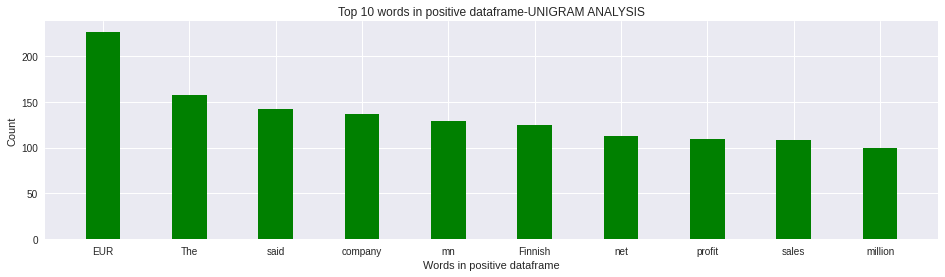

In [139]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

As you can see there's space included in unigram which skews the result so we'll remove it

In [136]:
del positiveValues['']

In [ ]:
positiveValues

Rerun the old code to get new values

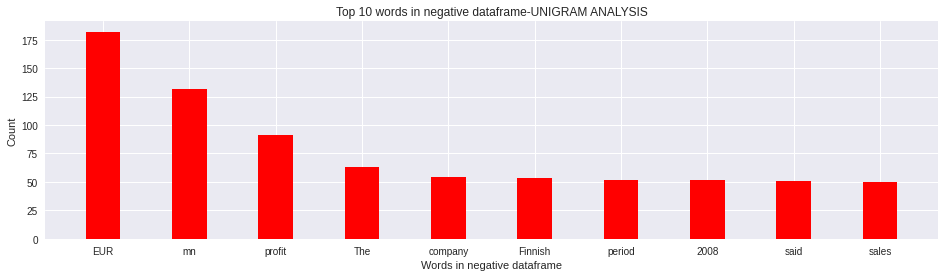

In [157]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

In [144]:
del negativeValues('')

SyntaxError: ignored

In [ ]:
negativeValues

In [158]:
del neutralValues('')

SyntaxError: ignored

In [163]:
for key, value in neutralValues.items():
  if key == '':
    print (value)

4264


In [165]:
del neutralValues['']

In [ ]:
neutralValues

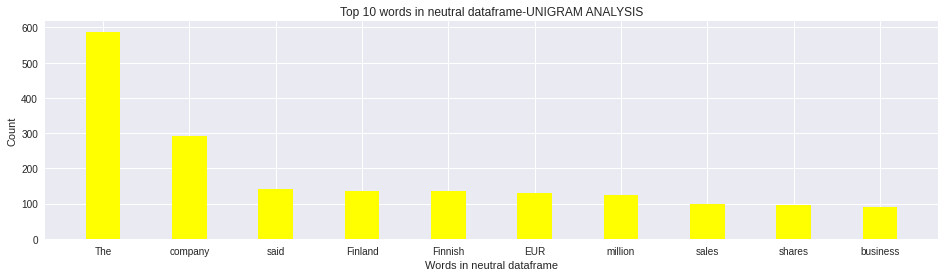

In [169]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [43]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

In [172]:
def get_key(val,my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [173]:
def get_val(key,my_dict):
    for keys, value in my_dict.items():
         if keys == key:
             return value
 
    return "key doesn't exist"

# **Sorting data in descending order**

In [185]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [178]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [50]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [51]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

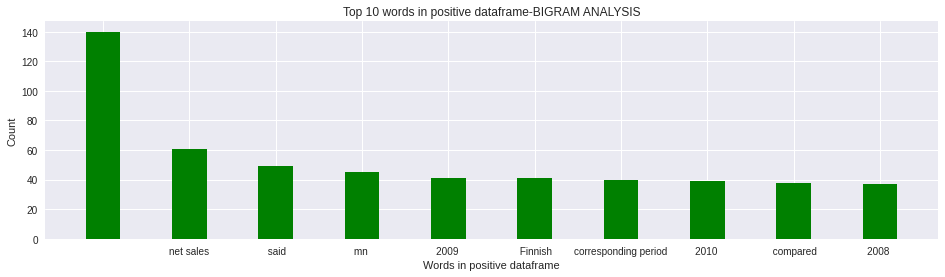

In [179]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

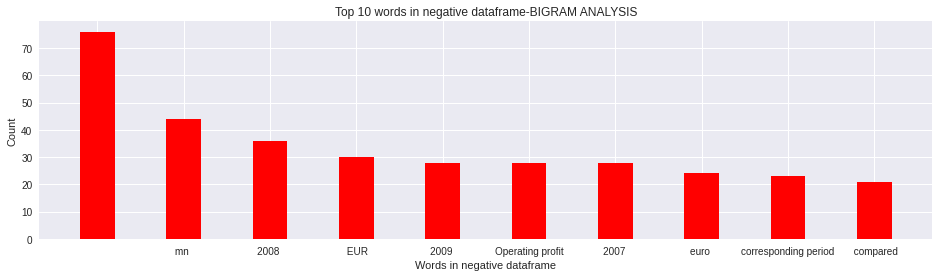

In [54]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

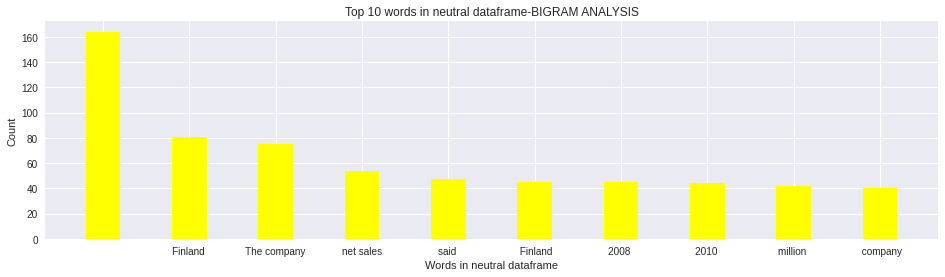

In [55]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

In [56]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

In [60]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [61]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [62]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [63]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

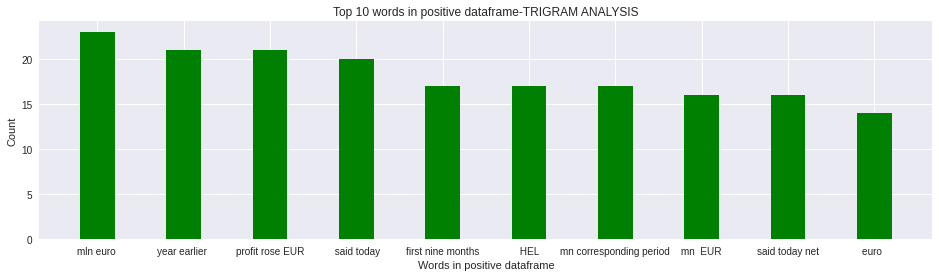

In [64]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

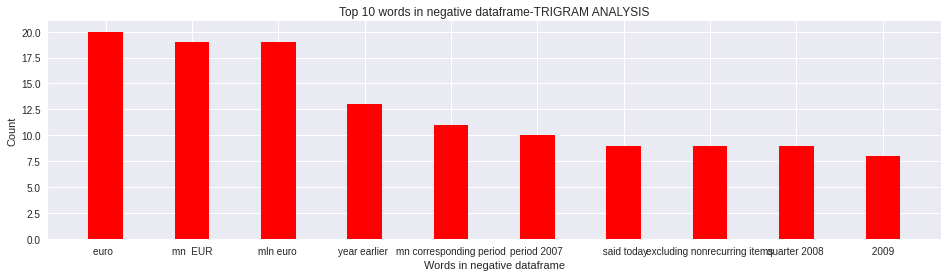

In [65]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

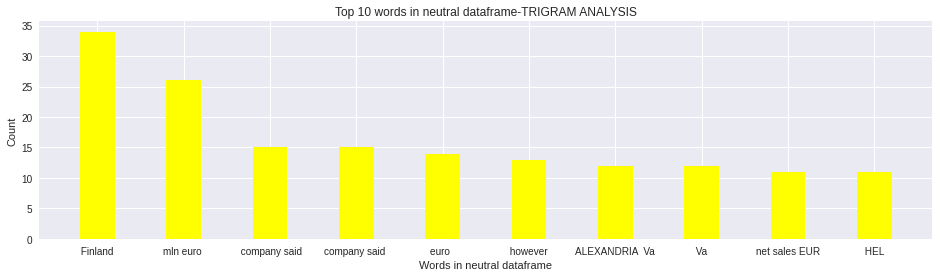

In [66]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

# **Results of the model**

From the above graphs, we can conclude that trigrams perform the best on our train data. This is because <br>
a) Unigram and Bigram tend to generate empty keys in the dictionary <br>
b) it provides more frequently used words such as profit rose EUR, year earlier from the positive data frame, corresponding period, period 2007, names of companies such as HEL from the negative data frame and Finland, company said and again names of companies such as HEL, OMX Helsinki and so on from the neutral data frame.